1.0
0.0033732071191839084
1.0


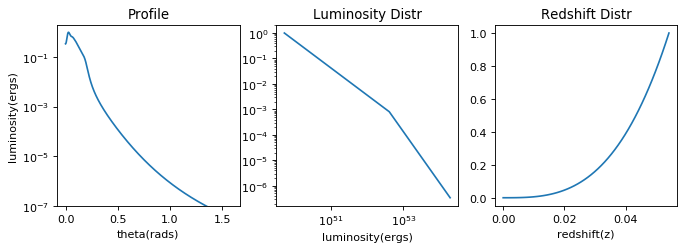

In [6]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from random import random as randdec
from numpy.random import uniform
from numpy.random import random_sample
import pandas as pd
from numpy import savetxt
import scipy as sp
from scipy import integrate

#---------------------------------------------

#profile loader [[theta must be in radians to at least np.pi/2]]

#Profile = pd.read_csv('func_epsilon_delta_45_theta_01.csv', sep = ',', header = None, names = ['theta','L'])
    #power law epsilon function only

#Profile = pd.read_csv('MCprofileIntegral.csv', sep = ',', header = None, names = ['theta','L'])
    #double integral using simulated data

#Profile = pd.read_csv('MCprofileAnalytic.csv', sep = ',', header = None, names = ['theta','L'])
    #3-piece piecewise function using q comparison to epsilon, constant gamma
    ####OBSOLETE

#Profile = pd.read_csv('MCprofileAnalyticx0y2.csv', sep = ',', header = None, names = ['theta','L'])
    #R x=0 y=2 integral using analytic structure
#Profile = pd.read_csv('MCprofileAnalyticx1yn3.csv', sep = ',', header = None, names = ['theta','L'])
    #R x=1 y=-3 integral using analytic structure

#Profile = pd.read_csv('MCprofileFitIntegral_gamma2-6.csv', sep = ',', header = None, names = ['theta','L'])
#Profile = pd.read_csv('MCprofileFitIntegral_gamma3.csv', sep = ',', header = None, names = ['theta','L'])
#Profile = pd.read_csv('MCprofileFitIntegral_gamma5.csv', sep = ',', header = None, names = ['theta','L'])
#Profile = pd.read_csv('MCprofileFitIntegral_gamma7.csv', sep = ',', header = None, names = ['theta','L'])
#Profile = pd.read_csv('MCprofileFitIntegral_gamma9.csv', sep = ',', header = None, names = ['theta','L'])
#Profile = pd.read_csv('MCprofileFitIntegral_gamma11.csv', sep = ',', header = None, names = ['theta','L'])
    #double integral using analytically fitted epsilon and gamma
    #gamma_min is the last number of file name

Profile = pd.read_csv('MCprofileR_x0_y2.csv', sep = ',', header = None, names = ['theta','L'])
#Profile = pd.read_csv('MCprofileR_x1_yn3.csv', sep = ',', header = None, names = ['theta','L'])
    #R fucntion based profile
    #(x,y) = (0,2) internal shock ; (1,-3) photospheric

Lmax = 2.0*(10**54.0) #ergs 
Lstar = 2.0*(10**52.0) #ergs    #1*10**52.5(0406.1944-5), 3*10**52 (1808.0749-6) (1808.04831-2)
Lmin = 5.0*(10**49.0) #ergs    
Lalpha = 0.95
Lbeta = 2.0
Hubble = 73.8 #km/s/Mpc
c = 299792 #km/s
dMax = 220 #Mpc
Zmax = (Hubble*dMax/c) #check expansion to more terms/ other method
thetamax = 90.0 #degrees

#---------------------------------------------

def LumDistr(L):
    "generates the values of the lumoninosity distribution of sGRB's according to \
    eqn (3) in 1808.04831.pdf"
    if(Lmin <= L <= Lstar):
        ldistr = (L**(-Lalpha))/(Lstar**(-Lalpha))
    else:
        ldistr = (L**(-Lbeta))/(Lstar**(-Lbeta))
    return(ldistr/296.45377964277907)

def RedDistr(z): #transformed into uniform distribtuion in main
    "generates the values of the redshift distribution of sGRB's according to \
    eqn (9) in 1405.5878.pdf"
    if(z <= 0.9):
        rdistr = (45.0 * np.exp((z-0.9)/0.39))*(z**3) ##cube is to make 3d distr
    else:
        rdistr = (45.0 * np.exp(-(z-0.9)/0.26))*(z**3)
    return(rdistr/0.000817109036252533)

def ThetaDistr(theta): #transformed into uniform distribution in main
    "its a co/sine/uniform. possibly determined from 'uniform in cosine theta' from \
    1808.04831-5"
    return np.sin(theta)

def GWcomparison(d,theta):
    "makes the lhs of the comparison function (10) in 1808.04831 to test \
    validity of solutions generated"
    return (dMax/d) * np.sqrt((1 + (6*(np.cos(theta)**2)) + (np.cos(theta)**4)) / 8)


fig = plt.figure(figsize=(10,3), dpi=80)

plot1 = plt.subplot2grid((1,3),(0,0))
plot1.plot(Profile['theta'],Profile['L'])
plot1.set_yscale('log')
plot1.set_ylim((10.0**(-7)),2)
plot1.set_title('Profile')
plot1.set_xlabel('theta(rads)')
plot1.set_ylabel('luminosity(ergs)')

plot2 = plt.subplot2grid((1,3),(0,1))
x2 = np.linspace(Lmin, Lmax, 50, endpoint=True)
luminosity =  np.array([])
for x in x2:
    luminosity = np.append(luminosity,LumDistr(x))
plot2.plot(x2,luminosity)
plot2.set_yscale('log')
plot2.set_xscale('log')
plot2.set_title('Luminosity Distr')
plot2.set_xlabel('luminosity(ergs)')

plot3 = plt.subplot2grid((1,3),(0,2))
x3 = np.linspace(0, Zmax, 50, endpoint=True)
redshift =  np.array([])
for x in x3:
    redshift = np.append(redshift,RedDistr(x))
plot3.plot(x3,redshift)
plot3.set_title('Redshift Distr')
plot3.set_xlabel('redshift(z)')

print(LumDistr(Lmin))
print(LumDistr(Lstar))
print(RedDistr(Zmax))

plt.savefig('2022anx0y2set')

29071
on-axis maximum is 0.0592rads 				 (log L)
probability of GW detection with no gamma-ray is 	0.898
probability of an on-axis sGRB given a GW is 		0.006
probability of an off-axis sGRB given a GW is 		0.095
on-axis maximum is 0.1000rads 				 (log L)
probability of GW detection with no gamma-ray is 	0.898
probability of an on-axis sGRB given a GW is 		0.017
probability of an off-axis sGRB given a GW is 		0.085


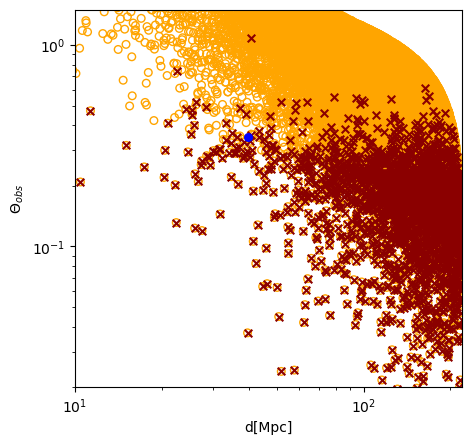

In [7]:
#---------------------------------------------

ncount = 0 #total population set size
wcount = 0 #wave detection set size
jcount = 0 #joint detection set size
waveset = np.array([])
jointset = np.array([])    
howmany = 0 #all successful detection set size

while (howmany < (10**5) ):

#---------------------------------------------
    ncount += 1 
    
    #Jet initializer for core lum, distance, observational angle
    params = np.array([])

    #luminosity in ergs
    while (len(params)<1):
        Lexp = uniform(np.log10(Lmin),np.log10(Lmax))
        L = 10**Lexp
        #N = uniform(0,1)
        N = random_sample()
        if (N <= LumDistr(L)):
            params_l = np.array([L])
            params = np.append(params, params_l)
        
        #N = uniform(0,1)
        #if(N <= 0.0033732071191839084):
        #    L = Lstar*(10.0**(-np.log10(N)*Lalpha))
        #else:
        #    L = Lstar*(10.0**(-np.log10(N)*Lbeta))
        #params_l = np.array([L])
        #params = np.append(params, params_l)
        
    #distance in redshift z
    while (len(params)<2):
        #zN = uniform(0,1)
        #z = uniform(0,Zmax)
        #if (zN <= RedDistr(z)):
        #    params_d = np.array([c*z/Hubble])
        #    params = np.append(params, params_d)
            
        #dist_n = uniform(0,dMax**3) #in Mpc
        dist_n = (dMax**3)*random_sample()
        params_d = np.array([(dist_n)**(1.0/3.0)])
        params = np.append(params, params_d)
            
    #angle in radians
    while (len(params)<3):
        theta_n = uniform(0,1) #(-1,1)? (0,1)? 
        #theta_n = random_sample()
        params_t = np.array([np.arccos(theta_n)])
        params = np.append(params, params_t)
        
##    print(params, len(params))

#---------------------------------------------

    #GW Signal and Jet Isotropic Luminosity
    jetset = np.array([])
    
    wave = GWcomparison(params[1], params[2])#calls GW comparison function in header block, double return
    
    jetset = np.append(params, wave)

    adjtheta = ((Profile['theta'])-params[2])**2 #square subtracts to find the closest theta value in the profile, double return
    mintheta = np.where(adjtheta == adjtheta.min()) #find the array index of the smallest adjusted theta (nearest to random), array return
    at_theta = max(mintheta[0]) #finds the furthest away match in case there are multiple, double return
##    print(Profile['theta'][at_theta])
    obslum = (Profile['L'][at_theta])*params[0] #takes the observation profile luminosity at the matched theta and scales it by the core, double return
    isojet = obslum/(4*np.pi*((params[1]*3.086*(10**24))**2)) #adjusts for spatial diffusion by dividing by 4*pi*d**2, double return
    
    jetset = np.append(jetset,obslum)
    jetset = np.append(jetset,isojet)
    
##    print(jetset, len(jetset))

    if (jetset[3] > 1.0):
        waveset = np.append(waveset, jetset)
        wcount+=1
        if (jetset[5] >= (5.8*(10**(-7)))):
            jointset = np.append(jointset, jetset)
            jcount+=1
            
    howmany+=1

##    print(waveset)
##    print(jointset)

WaveDetect1 = waveset.reshape(int(len(waveset)/6),6)
JointDetect1 = jointset.reshape(int(len(jointset)/6),6)

##   final array form [corelum, d, theta, GW strength, Gamma Strength at angle, Gamma Strength as observed]

print(len(WaveDetect1))
##print(JointDetect1[:,0])
##print(np.average(JointDetect1[:,0]))

#---------------------------------------------

#testing to see if things are working per array
#savetxt('TESTFILEgws.csv', fGWS1, delimiter=',')
#savetxt('TESTFILEgammas.csv', fGAMMAS1, delimiter=',')

#---------------------------------------------

#half-max energy angle finder
i = 1
integralsum = np.array([])
while (i < len(Profile['L'])):
    integral = sp.integrate.trapz(y=Profile['L'][0:i], x=Profile['theta'][0:i])
    integralsum = np.append(integralsum,integral)
    i+=1
halfintegral = max(integralsum)/2
corelimadj = (integralsum-halfintegral)**2
corelim = np.where(corelimadj == corelimadj.min())

onofflim = (Profile['theta'][int(corelim[0])+1]) #radians

#---------------------------------------------

#probability finder
for radcore in [onofflim, 0.1]:
    print(f"on-axis maximum is {radcore:5.4f}rads \t\t\t\t (log L)")

    on1 = 0
    off1 = 0
    i = 0
    while (i < (len(JointDetect1[:,1]))):
        if (JointDetect1[i,2] <= radcore):
            on1+=1
        else:
            off1+=1
        i+=1
    gwnogam1 = 1-(jcount)/(wcount)
    print(f"probability of GW detection with no gamma-ray is \t{gwnogam1:4.3f}")
    onjoint1 = (on1/(jcount))*((jcount)/(wcount))
    print(f"probability of an on-axis sGRB given a GW is \t\t{onjoint1:4.3f}")
    offjoint1 = (off1/(jcount))*((jcount)/(wcount))
    print(f"probability of an off-axis sGRB given a GW is \t\t{offjoint1:4.3f}")
    
#---------------------------------------------

plt.figure(figsize=(5,5), dpi=100)
plt.xlabel('d[Mpc]')
plt.ylabel('$\Theta_{obs}$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10,220)
plt.ylim(0.02,1.5)

x1 = WaveDetect1[:,1]
y1 = WaveDetect1[:,2]
x2 = JointDetect1[:,1]
y2 = JointDetect1[:,2] 
plt.scatter(x1, y1, marker='o', s=30, facecolors='none', edgecolors='orange', label='GW only')
plt.scatter(x2, y2, marker='x', s=30, color='darkred', label='GW + Gamma')
plt.scatter([39.65851769524674],[0.34997856876844136], s=30, color='blue', label='GW170817')

#plt.legend()

plt.savefig('2022anx0y2hit')

In [3]:
#savetxt('DetectionData_Simulated_Joint_3.txt', JointDetect1, delimiter='\t')

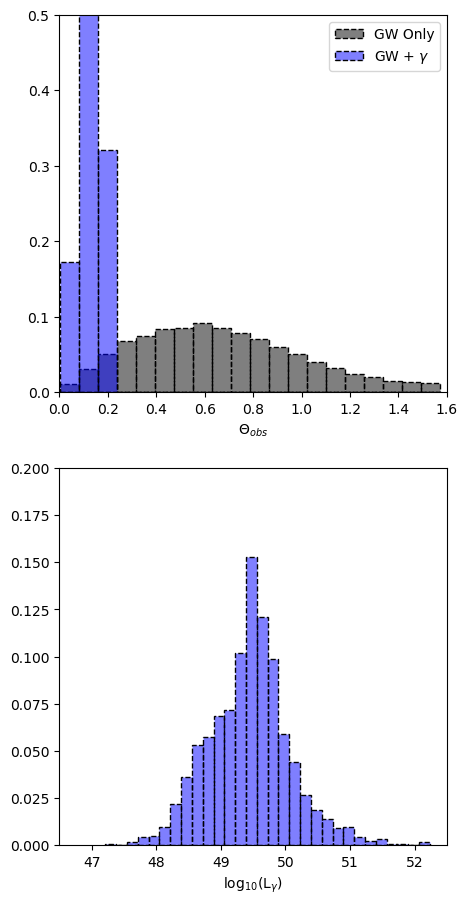

In [4]:
fig = plt.figure(figsize=(5,11), dpi=100)

############################ log L lin d and theta
plot1 = plt.subplot2grid((2,1),(0,0))
plot1.set_xlabel('$\Theta_{obs}$')
plot1.set_xlim(0,1.6)
plot1.set_ylim(0,0.5)
weights1 = np.ones_like(WaveDetect1[:,2]) / len(WaveDetect1[:,2])
weights2 = np.ones_like(JointDetect1[:,2]) / len(JointDetect1[:,2])
(histogram, edges, patches) = plt.hist(WaveDetect1[:,2], bins=20, range=(min(WaveDetect1[:,2]),max(WaveDetect1[:,2])), histtype='bar', weights=weights1, edgecolor='black', ls='dashed', lw=1, fc=(0, 0, 0, 0.5), label='GW Only')
(histogram, edges, patches) = plt.hist(JointDetect1[:,2], bins=20, range=(min(WaveDetect1[:,2]),max(WaveDetect1[:,2])), histtype='bar', weights=weights2, edgecolor='black', ls='dashed', lw=1, fc=(0, 0, 1, 0.5), label='GW + $\gamma$')
plt.legend()

plot2 = plt.subplot2grid((2,1),(1,0))
plot2.set_xlabel('log$_{10}$(L$_{\gamma}$)')
plot2.set_ylim(0,0.2)
#plot2.set_xlim(np.log10(Lmin),np.log10(Lmax))
plot2.set_xlim(46.5,52.5)
weights3 = np.ones_like(JointDetect1[:,4]) / len(JointDetect1[:,4])
(histogram, edges, patches) = plt.hist(np.log10(JointDetect1[:,4]), bins=30, histtype='bar', weights=weights3, edgecolor='black', ls='dashed', lw=1, fc=(0, 0, 1, 0.5), label='core lum')
#plt.legend()

plt.savefig('2022anx0y2dist')

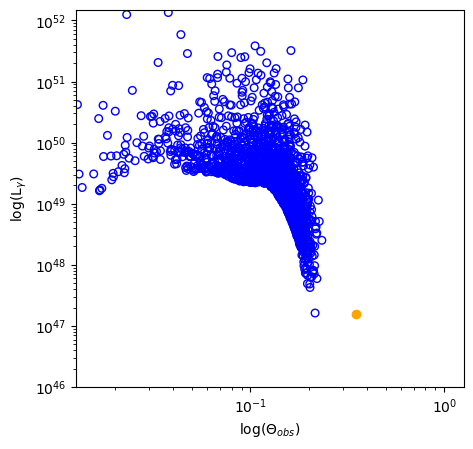

In [5]:
plt.figure(figsize=(5,5), dpi=100)

plt.xlabel('log($\Theta_{obs}$)')
plt.ylabel('log(L$_{\gamma}$)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**-1.9,10**0.1)
plt.ylim(1.0*(10**46),1.5*(10**52))
plt.scatter((JointDetect1[:,2]), (JointDetect1[:,4]), marker='o', s=30, facecolors='none', edgecolors='blue')
plt.scatter([0.35],[1.6*(10**47)], color='orange')

plt.savefig('2022anx0y2bound')